
# Analysis of Zipf's Law and Zipf's Law of Abbreviation

You can open and easily run this notebook on:
https://colab.research.google.com/drive/1eHG8p3liKNz2atMinlOJpHvpAgkvipPd?usp=sharing

This notebook analyzes Zipf's Law and Zipf's Law of Abbreviation for English and Italian text corpora.  It leverages the spaCy library for natural language processing tasks.

## Setup and Data Loading

1. **Dependencies:** Installs necessary libraries (spacy, matplotlib, numpy, etc.) and downloads language models (`en_core_web_sm`, `it_core_news_sm`).
2. **Data Download:** Retrieves English and Italian text files from a GitHub repository.
3. **Data Preparation Functions:**
    - `load_file`: Loads text data from a file.
    - `lemmatize`: Cleans text (removes punctuation, lowercases), lemmatizes words using the specified spaCy model.

## Data Processing

Loads the English and Italian text data, and applies the `lemmatize` function to each.

## Visualization Functions

- `plot_word_frequency`: Generates a bar plot of the most frequent words, optionally adding a theoretical line representing Zipf's Law and logarithmic scaling.
- `plot_zipfs_law_abbreviation`: Creates a scatter plot illustrating Zipf's Law of Abbreviation (relationship between word frequency and word length).
- `get_zips_law_abbreviation_params`: Helper function to calculate parameters for zipf's law of abbreviation model.
- `get_descriptive_stats`: Computes and displays descriptive statistics (mean, median, standard deviation, min, max, Pearson & Spearman correlation) for word lengths and frequencies.


## Analysis and Visualization

The code then visualizes the following:

1. **Word Frequency (English):** A bar plot showing the frequency of the top 30 most frequent words in the English text, along with a theoretical Zipf's Law line. Logarithmic scale is used for better visualization of frequency distribution.
2. **Zipf's Law of Abbreviation (English):** A scatter plot displaying the relationship between word frequency and length for the top 5000 words in the English text. Logarithmic scale applied to y-axis.
3. **Word Frequency (Italian):** Similar to step 1 but for the Italian text.
4. **Zipf's Law of Abbreviation (Italian):** Similar to step 2 but for the Italian text.


## Zipf's Law of Abbreviation Explanation:

A brief explanation of Zipf's Law of Abbreviation is provided: more frequent words tend to be shorter (e.g., "the," "and," "of").


##  Descriptive Statistics

Descriptive statistics are computed and displayed for both English and Italian corpora to provide quantifiable insights into word frequency and length distributions.  Correlation between frequency and length is calculated to demonstrate the relationship between word frequency and length quantitatively.

Let's install the required dependencies and download the data to be analysed

In [1]:
!pip install spacy
!python -m spacy download en_core_web_sm
!python -m spacy download it_core_news_sm

!wget https://github.com/maxdegtyarev/NLP/raw/refs/heads/main/ex_1/input_en.txt -O input_en.txt
!wget https://raw.githubusercontent.com/maxdegtyarev/NLP/refs/heads/main/ex_1/input_it.txt -O input_it.txt


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 70.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 54.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('it_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
--2025-02-10 21:42:42--  https://github.com/maxdegtyarev/NLP/raw/refs/heads/main/ex_1/input_en.txt
Resolving github.com (github.com)... 140.82.113.3
Connecting to gi

In [2]:
import spacy
import random
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
from collections import Counter
import scipy.stats as stats
import pandas as pd

Basic function for our data preparation:

In [3]:
import re
def load_file(filename: str) -> list[str]: # File loader
  with open(filename, "r", encoding="utf-8") as file:
    return file.readlines()

def lemmatize(text: str, nlp_model) -> list[str]: # Lemmatization function
  text = re.sub(r'[^\w\s]', '', text).lower()  # Removes punctuation and lowercase
  doc = nlp_model(text)
  return [token.lemma_ for token in doc if token.is_alpha]

Now we are loading the prepared models

In [4]:
# load the models
nlp_en = spacy.load("en_core_web_sm")
nlp_it = spacy.load("it_core_news_sm")

# At this step we are going to load, clean and lemmatize the texts using the models from the cell above


In [5]:
english_input = "".join(load_file("input_en.txt")) #load the text for english
italian_input = "".join(load_file("input_it.txt"))
tokens_lemmatized_en = lemmatize(english_input, nlp_en) #lemmatized words
tokens_lemmatized_it = lemmatize(italian_input, nlp_it)

In [6]:
tokens_lemmatized_it[:5]

['a', 'narrare', 'il', 'mutare', 'di il']

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# This is the classic Zip's law visualisation that is used to explore and visualise the data
def plot_word_frequency(words, title: str, add_theoretical_line: bool = False, add_normalization: bool = False, logscale: bool = False, top_n=10):
    """
    Function to plot the top-N most frequent words from a list of tokens.

    :param words: List of words (tokens)
    :param top_n: Number of top words to display in the bar plot
    :return: Seaborn barplot object
    """
    # Count the frequency of each word
    word_counts = Counter(words)

    # Get the top_n most common words
    most_common = word_counts.most_common(top_n)

    # Separate the words (labels) and their counts
    labels = [item[0] for item in most_common]
    counts = [item[1] for item in most_common]

    if add_normalization:
      total_words = sum(counts)
      counts = [count / total_words for count in counts]

    # Create the figure
    plt.figure(figsize=(12, 5))
    plt.title(title if not logscale else title + " (Logarithmic Scale)")
    plt.xlabel("Word")
    plt.ylabel("Count")

    # Create the bar plot
    sns.set_theme(style="whitegrid", palette="pastel")
    plot = sns.barplot(x=labels, y=counts)

    if add_theoretical_line:
      # --- Zipf's Law Line Chart ---
      # Ranks from 1 to top_n
      ranks = range(1, top_n + 1)

      # The highest frequency in the data is used as the base
      freq_most_common = counts[0]  # freq of rank 1 word

      # Theoretical Zipf frequency for rank r ~ freq_most_common / r
      zipf_counts = [freq_most_common / r for r in ranks]

      # Plot the line chart on top (using integer positions on the x-axis)
      plt.plot(range(len(labels)), zipf_counts, marker='o', color='red', label="Zipf's Law (1/rank)")

    if logscale:
        plt.yscale('log')

    # Optional: Add value labels above each bar
    for i, count in enumerate(counts):
        plt.text(x=i, y=count + 0.5, s=str(count), ha='center')

    plt.tight_layout()
    plt.show()

    return plot

In [8]:
# This function visualises the zipfs_law_abbreviation to be used in our research
def plot_zipfs_law_abbreviation(words,
                                title: str,
                                logscale: bool = False,
                                top_n: int = 10):
    """
    Plots the relationship between word frequency and word length for the top-N words,
    illustrating Zipf's Law of Abbreviation (i.e., more frequent words tend to be shorter).

    :param words: List of word tokens.
    :param title: Title of the plot.
    :param add_theoretical_line: If True, overlay a theoretical line based on the model
                                 frequency * length = constant (anchored on the most frequent word).
    :param add_normalization: If True, use relative frequency (i.e., count/total) instead of raw counts.
    :param logscale: If True, set both axes to a logarithmic scale.
    :param top_n: Number of top words to include in the plot.
    :return: Seaborn scatter plot object.
    """
    # Count frequencies and get the top_n words
    word_counts = Counter(words)
    most_common = word_counts.most_common(top_n)

    # Extract words, frequencies, and lengths (in characters)
    labels = [word for word, count in most_common]
    frequencies = [count for word, count in most_common]
    lengths = [len(word) for word, count in most_common]

    # Set up the plot
    plt.figure(figsize=(12, 5))
    plt.title(title + (" (Log Scale)" if logscale else ""))
    plt.xlabel("Word Length (Characters)")
    plt.ylabel("Frequency")

    sns.set_theme(style="whitegrid", palette="pastel")
    #plot = sns.displot(x=frequencies, y=lengths, kind="scatter", s=100)
    plot = sns.scatterplot(x=lengths, y=frequencies, s=100)

    # Optionally overlay the theoretical Zipf's law of abbreviation line.
    # Here we assume a simple relationship: frequency * length ≈ constant.
    # We use the most frequent word as the anchor: constant = freq_max * length_max.

    # Apply log scale if requested
    if logscale:
        plt.yscale('log')

    plt.tight_layout()

    points_to_visualise = [0, 10, 100, 1000, 3000, 5000]
    for i, LF in enumerate(zip(lengths, frequencies)):
      if i in points_to_visualise:
        plt.text(LF[0], LF[1], f" {labels[i]}",
                  horizontalalignment='left', verticalalignment='bottom')

    plt.show()


    return plot

In [9]:
def get_zips_law_abbreviation_params(words: list[str]):
    """
    Calculates the required params for zip's law of abbreviation model
    """
    # Count frequencies and get the top_n words
    word_counts = Counter(words)

    # Extract words, frequencies, and lengths (in characters)
    frequencies = list(word_counts.values())
    lengths = [len(word) for word in word_counts.keys()]

    return frequencies, lengths

def get_descriptive_stats(words: list[str], language: str):
  freqs, lengths = get_zips_law_abbreviation_params(words)
  # Compute descriptive statistics for word lengths
  mean_word_length = np.mean(lengths)
  median_word_length = np.median(lengths)
  std_word_length = np.std(lengths)
  min_word_length = np.min(lengths)
  max_word_length = np.max(lengths)

  # Compute descriptive statistics for word frequencies
  mean_freq = np.mean(freqs)
  median_freq = np.median(freqs)
  std_freq = np.std(freqs)
  min_freq = np.min(freqs)
  max_freq = np.max(freqs)

  # Compute correlation between word length and frequency
  pearson_corr, _ = stats.pearsonr(freqs, lengths)
  spearman_corr, _ = stats.spearmanr(freqs, lengths)

  # Print the results
  print(f"""\n--- Descriptive Statistics for Zipf’s Law of Abbreviation for {language} ---

            ---  ---
            Mean Word Length: {mean_word_length:.2f}
            Median Word Length: {median_word_length}
            Std Dev Word Length: {std_word_length:.2f}
            Min Word Length: {min_word_length}, Max Word Length: {max_word_length}

            Word Frequency Statistics:
            Mean Word Frequency: {mean_freq:.2f}
            Median Word Frequency: {median_freq}
            Std Dev Word Frequency: {std_freq:.2f}
            Min Word Frequency: {min_freq}, Max Word Frequency: {max_freq}

            Correlation Analysis:
            Pearson Correlation (word frequency vs length): {pearson_corr:.4f}
            Spearman Correlation (word frequency vs length): {spearman_corr:.4f}""")

Now let's visualise the data overall

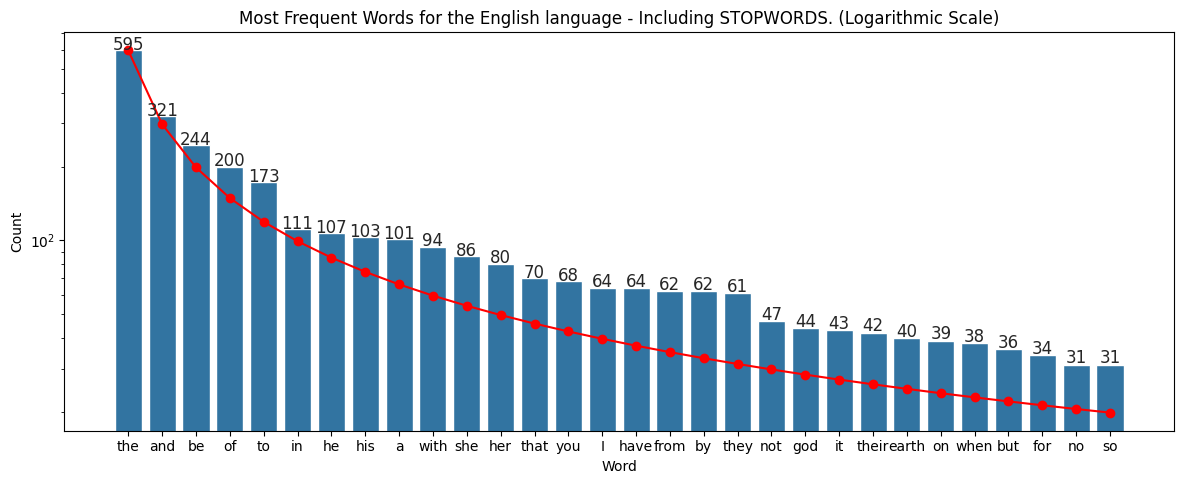

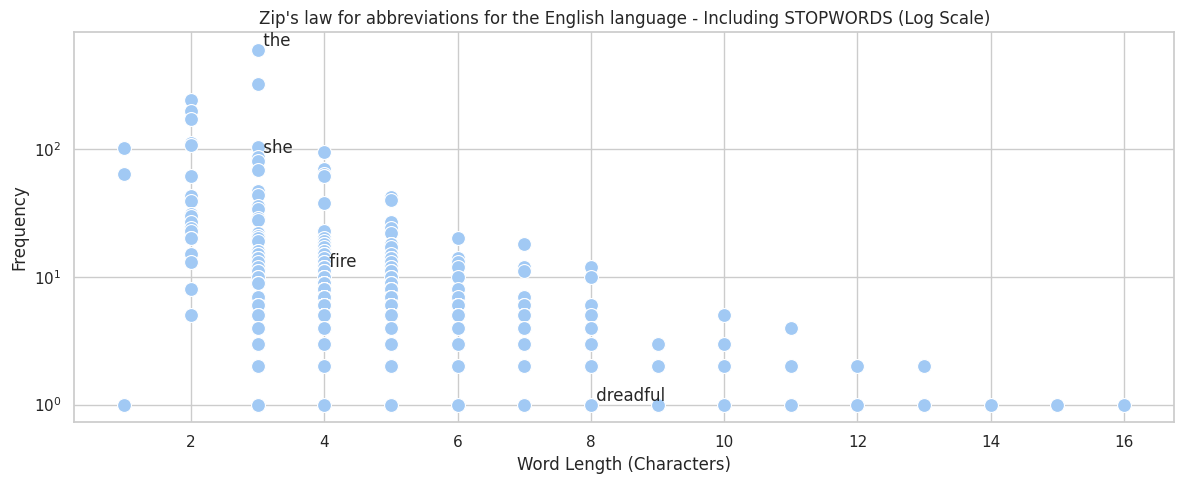

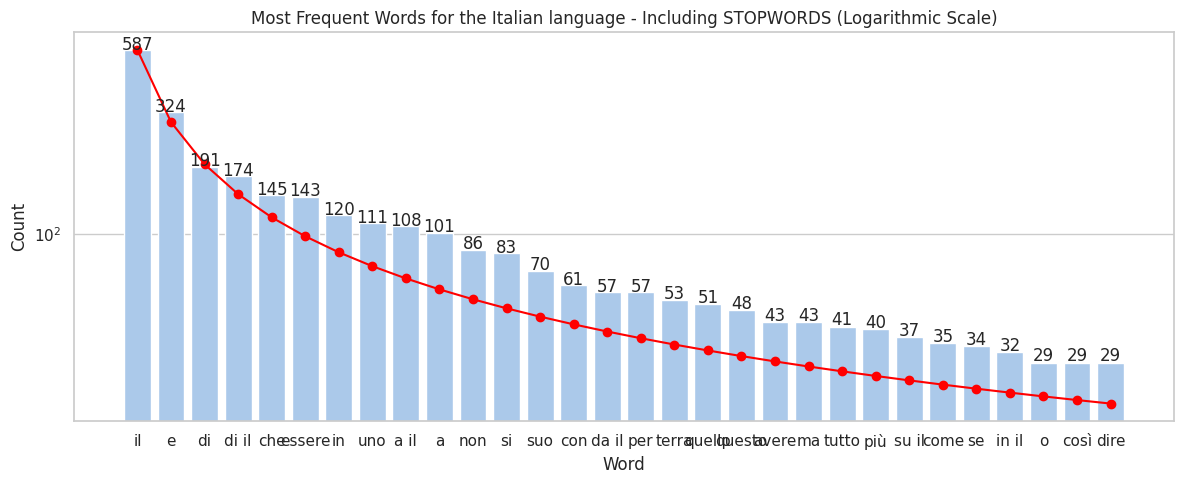

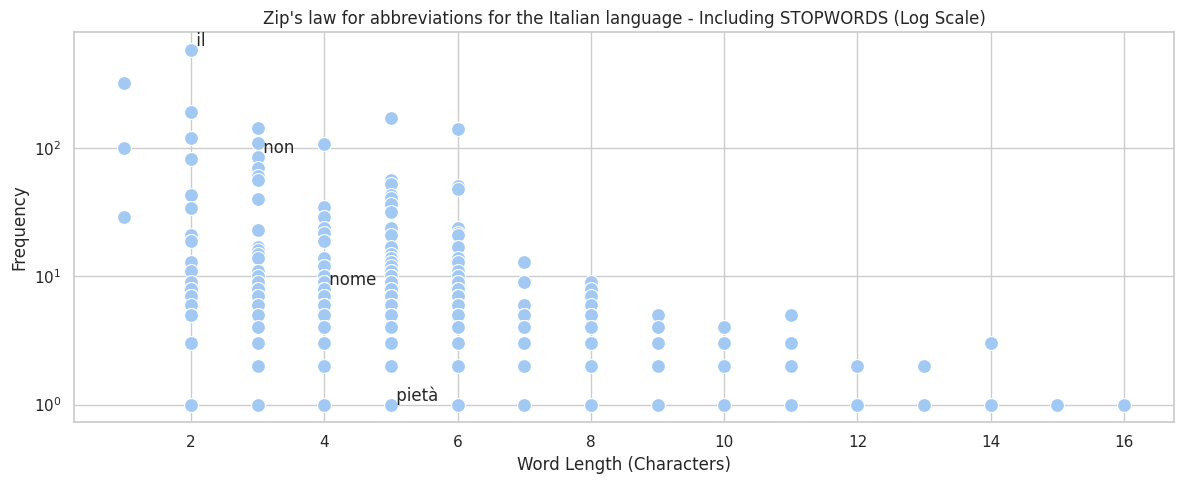

<Axes: title={'center': "Zip's law for abbreviations for the Italian language - Including STOPWORDS (Log Scale)"}, xlabel='Word Length (Characters)', ylabel='Frequency'>

In [10]:
plot_word_frequency(words = tokens_lemmatized_en,
                    title="Most Frequent Words for the English language - Including STOPWORDS.",
                    add_theoretical_line=True,
                    add_normalization=False,
                    logscale=True,
                    top_n = 30)

plot_zipfs_law_abbreviation(words = tokens_lemmatized_en,
                    title="Zip's law for abbreviations for the English language - Including STOPWORDS",
                    top_n=5000, logscale=True)

plot_word_frequency(words = tokens_lemmatized_it,
                    title="Most Frequent Words for the Italian language - Including STOPWORDS",
                    add_theoretical_line=True,
                    add_normalization=False,
                    logscale=True,
                    top_n = 30)

plot_zipfs_law_abbreviation(words = tokens_lemmatized_it,
                    title="Zip's law for abbreviations for the Italian language - Including STOPWORDS",
                    top_n=5000,
                            logscale=True)


Zipf’s law of abbreviation is a related phenomenon stating that more frequently used words tend to be shorter. For example, in English, words like “the,” “and,” “of” (which are very frequent) are also very short, whereas less frequent words tend to be longer.

# Now let's prepare the function to compare zip's abbreviation with the theoretical model


--- Descriptive Statistics for Zipf’s Law of Abbreviation for English ---

            ---  ---
            Mean Word Length: 5.87
            Median Word Length: 6.0
            Std Dev Word Length: 2.03
            Min Word Length: 1, Max Word Length: 16

            Word Frequency Statistics:
            Mean Word Frequency: 4.45
            Median Word Frequency: 1.0
            Std Dev Word Frequency: 20.10
            Min Word Frequency: 1, Max Word Frequency: 595

            Correlation Analysis:
            Pearson Correlation (word frequency vs length): -0.1893
            Spearman Correlation (word frequency vs length): -0.3825

--- Descriptive Statistics for Zipf’s Law of Abbreviation for Italian ---

            ---  ---
            Mean Word Length: 7.15
            Median Word Length: 7.0
            Std Dev Word Length: 2.22
            Min Word Length: 1, Max Word Length: 16

            Word Frequency Statistics:
            Mean Word Frequency: 3.22
            Medi

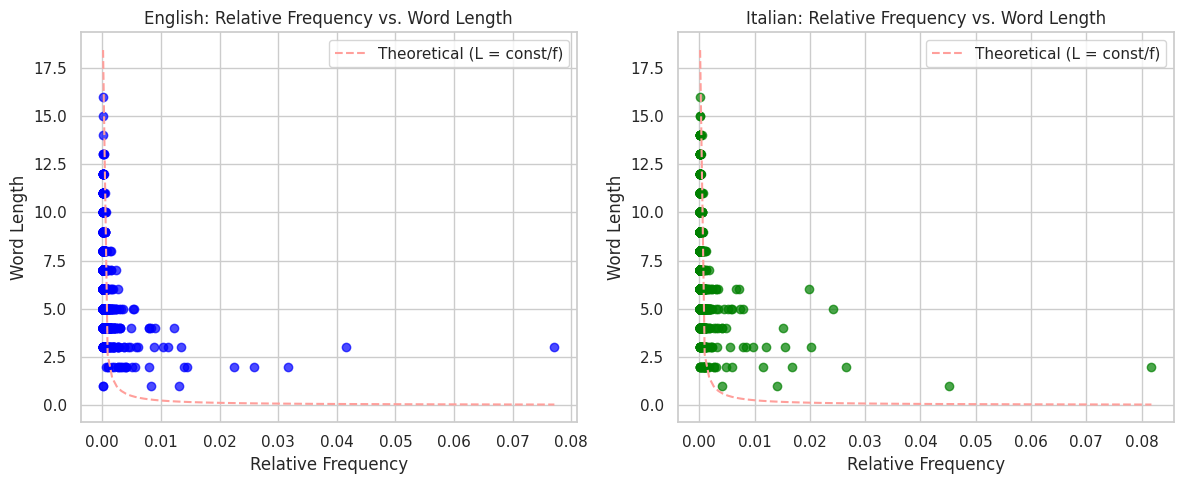

In [11]:

def compare_zipfs_abbreviation(tokens_lang1, tokens_lang2, lang1_name="Language 1", lang2_name="Language 2"):
    """
    Compares the Zipf's Law of Abbreviation for two languages by plotting
    relative frequency vs. word length side-by-side.

    Parameters:
      tokens_lang1 (list): List of lemmatized tokens for language 1.
      tokens_lang2 (list): List of lemmatized tokens for language 2.
      lang1_name (str): Name of language 1 (e.g., "English").
      lang2_name (str): Name of language 2 (e.g., "Italian").

    Returns:
      None. Displays a matplotlib figure.
    """
    get_descriptive_stats(tokens_lang1, lang1_name)
    get_descriptive_stats(tokens_lang2, lang2_name)
    # Get frequencies and word lengths from your pre-defined function.
    freqs1, lengths1 = get_zips_law_abbreviation_params(tokens_lang1)
    freqs2, lengths2 = get_zips_law_abbreviation_params(tokens_lang2)

    # Normalize frequencies to obtain relative frequencies
    rel_freqs1 = freqs1 / np.sum(freqs1)
    rel_freqs2 = freqs2 / np.sum(freqs2)

    # Theoretical model: assume avg of frequency * length = constant (using the most common word as anchor)
    constant_1 = np.mean(rel_freqs1 * lengths1)
    constant_2 = np.mean(rel_freqs2 * lengths2)

    # For a set of frequency values spanning the observed range:
    f_line_1 = np.linspace(rel_freqs1.min(), rel_freqs1.max(), 100)
    f_line_2 = np.linspace(rel_freqs2.min(), rel_freqs2.max(), 100)

    theoretical_lengths_1 = constant_1 / f_line_1
    theoretical_lengths_2 = constant_1 / f_line_1

    # Create side-by-side subplots for comparison
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))

    # Plot for language 1
    axs[0].scatter(rel_freqs1, lengths1, alpha=0.7, color='blue')
    axs[0].plot(f_line_1, theoretical_lengths_1, 'r--', label='Theoretical (L = const/f)')
    axs[0].set_title(f"{lang1_name}: Relative Frequency vs. Word Length")
    axs[0].set_xlabel("Relative Frequency")
    axs[0].set_ylabel("Word Length")
    axs[0].legend()
    # Plot for language 2
    axs[1].scatter(rel_freqs2, lengths2, alpha=0.7, color='green')
    axs[1].plot(f_line_2, theoretical_lengths_2, 'r--', label='Theoretical (L = const/f)')
    axs[1].set_title(f"{lang2_name}: Relative Frequency vs. Word Length")
    axs[1].set_xlabel("Relative Frequency")
    axs[1].set_ylabel("Word Length")
    axs[1].legend()
    plt.tight_layout()
    plt.show()

compare_zipfs_abbreviation(
    tokens_lang1=tokens_lemmatized_en,
    tokens_lang2=tokens_lemmatized_it,
    lang1_name="English",
    lang2_name="Italian"
)


# The linear model development

In [12]:

def compute_zipf_with_abbreviation_parameters(words, top_n=50):
    """
    Computes the slope and intercept for Zipf's law of abbreviation using a log-log regression,
    where we model log(frequency) = slope * log(word length) + intercept.

    :param words: List of tokens (words)
    :param top_n: Number of top words to include in the regression
    :return: (slope, intercept, lengths, frequencies)
    """
    # Count word frequencies and get the top_n most common words
    word_counts = Counter(words)
    most_common = word_counts.most_common(top_n)

    # Extract frequencies and corresponding word lengths

    frequencies = np.array([count for (_, count) in most_common])
    lengths = np.array([len(word) for (word, _) in most_common])

    # Compute log values
    log_lengths = np.log(lengths)
    log_freqs = np.log(frequencies)
    # kX + b
    # Fit a line: log(freq) = slope * log(length) + intercept
    slope, intercept = np.polyfit(log_lengths, log_freqs, 1)
    return slope, intercept, lengths, frequencies

def plot_zipf_comparison(lang1_words, lang2_words, lang1_name="Language 1", lang2_name="Language 2", top_n=50):
    """
    Plots the log-log relationship between word frequency and word length for two corpora,
    fits linear regressions (for Zipf's law of abbreviation), and displays the slopes for comparison.

    :param lang1_words: List of tokens for language 1
    :param lang2_words: List of tokens for language 2
    :param lang1_name: Name for language 1 (e.g., "English")
    :param lang2_name: Name for language 2 (e.g., "Italian")
    :param top_n: Number of top words to include in the regression
    """
    # Compute parameters for language 1
    l1_slope, l1_intercept, l1_lengths, l1_freqs = compute_zipf_with_abbreviation_parameters(lang1_words, top_n)
    # Compute parameters for language 2
    l2_slope, l2_intercept, l2_lengths, l2_freqs = compute_zipf_with_abbreviation_parameters(lang2_words, top_n)

    # Prepare a plot on a log-log scale
    plt.figure(figsize=(10, 6))

    # Plot language 1 data (log(word length) vs. log(frequency))
    sns.scatterplot(x=np.log(l1_lengths), y=np.log(l1_freqs), color='blue', label=f'{lang1_name} Data')
    # Plot language 2 data
    sns.scatterplot(x=np.log(l2_lengths), y=np.log(l2_freqs), color='green', label=f'{lang2_name} Data')

    # Determine common x-range for fitted lines based on both languages’ word lengths
    all_log_lengths = np.concatenate((np.log(l1_lengths), np.log(l2_lengths)))
    x_vals = np.linspace(all_log_lengths.min(), all_log_lengths.max(), 100)

    # Plot the fitted lines
    plt.plot(x_vals, l1_slope * x_vals + l1_intercept, color='blue', linestyle='--',
             label=f'{lang1_name} Fit (slope = {l1_slope:.2f})')
    plt.plot(x_vals, l2_slope * x_vals + l2_intercept, color='green', linestyle='--',
             label=f'{lang2_name} Fit (slope = {l2_slope:.2f})')

    plt.xlabel("log(Word Length)")
    plt.ylabel("log(Frequency)")
    plt.title(f"Zipf's Law of Abbreviation Comparison ({lang1_name} vs. {lang2_name})")
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Print the slopes for comparison
    print(f"{lang1_name} Zipf slope: {l1_slope:.2f}, intercept: {l1_intercept:.2f}")
    print(f"{lang2_name} Zipf slope: {l2_slope:.2f}, intercept: {l2_intercept:.2f}")

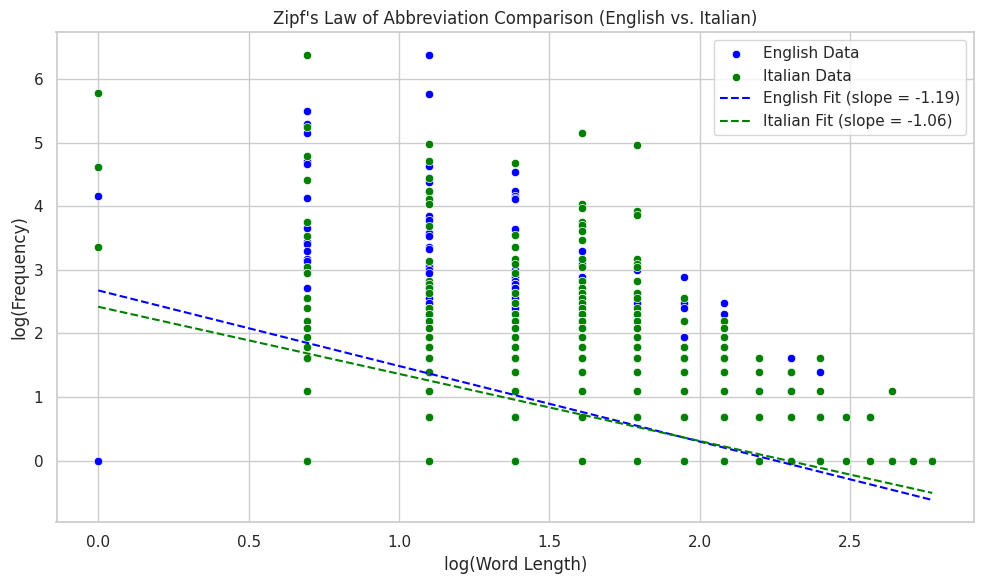

English Zipf slope: -1.19, intercept: 2.68
Italian Zipf slope: -1.06, intercept: 2.42


In [13]:
plot_zipf_comparison(lang1_words=tokens_lemmatized_en, lang2_words=tokens_lemmatized_it,
                     lang1_name="English",
                     lang2_name="Italian",
                     top_n=5000)

The fact that we obtained relatively similar slopes indicates that the decay in word frequency with rank is very similar between the two corpora. In other words, both datasets exhibit a nearly identical power‐law behavior according to Zipf’s law.